# Red Wine Quality Prediction Model

#### Team 8 - Jiazu Zhang - jz944
#### Team 8 - Mengjia Wei - mw1296
#### Team 8 - Ahmed Khair - afk46

# 3. Analysis of the dataset and Trained Model

### 3.1 Load dataset and packages

In [3]:
# Loading the necessary packages
import random
from seaborn.palettes import color_palette
random.seed(9001)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

# Load the dataset
gr8_wq= pd.read_csv("dataset/winequality-red.csv",header=0)

### 3.2 Show first rows of dataset and describe the dataframe

In [10]:
# Show first 10 rows of the dataframe
gr8_wq.head(11)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [11]:
# Describe dataset
gr8_wq.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 3.3 Create pairplot for whole dataset to observe the distributions and correlations

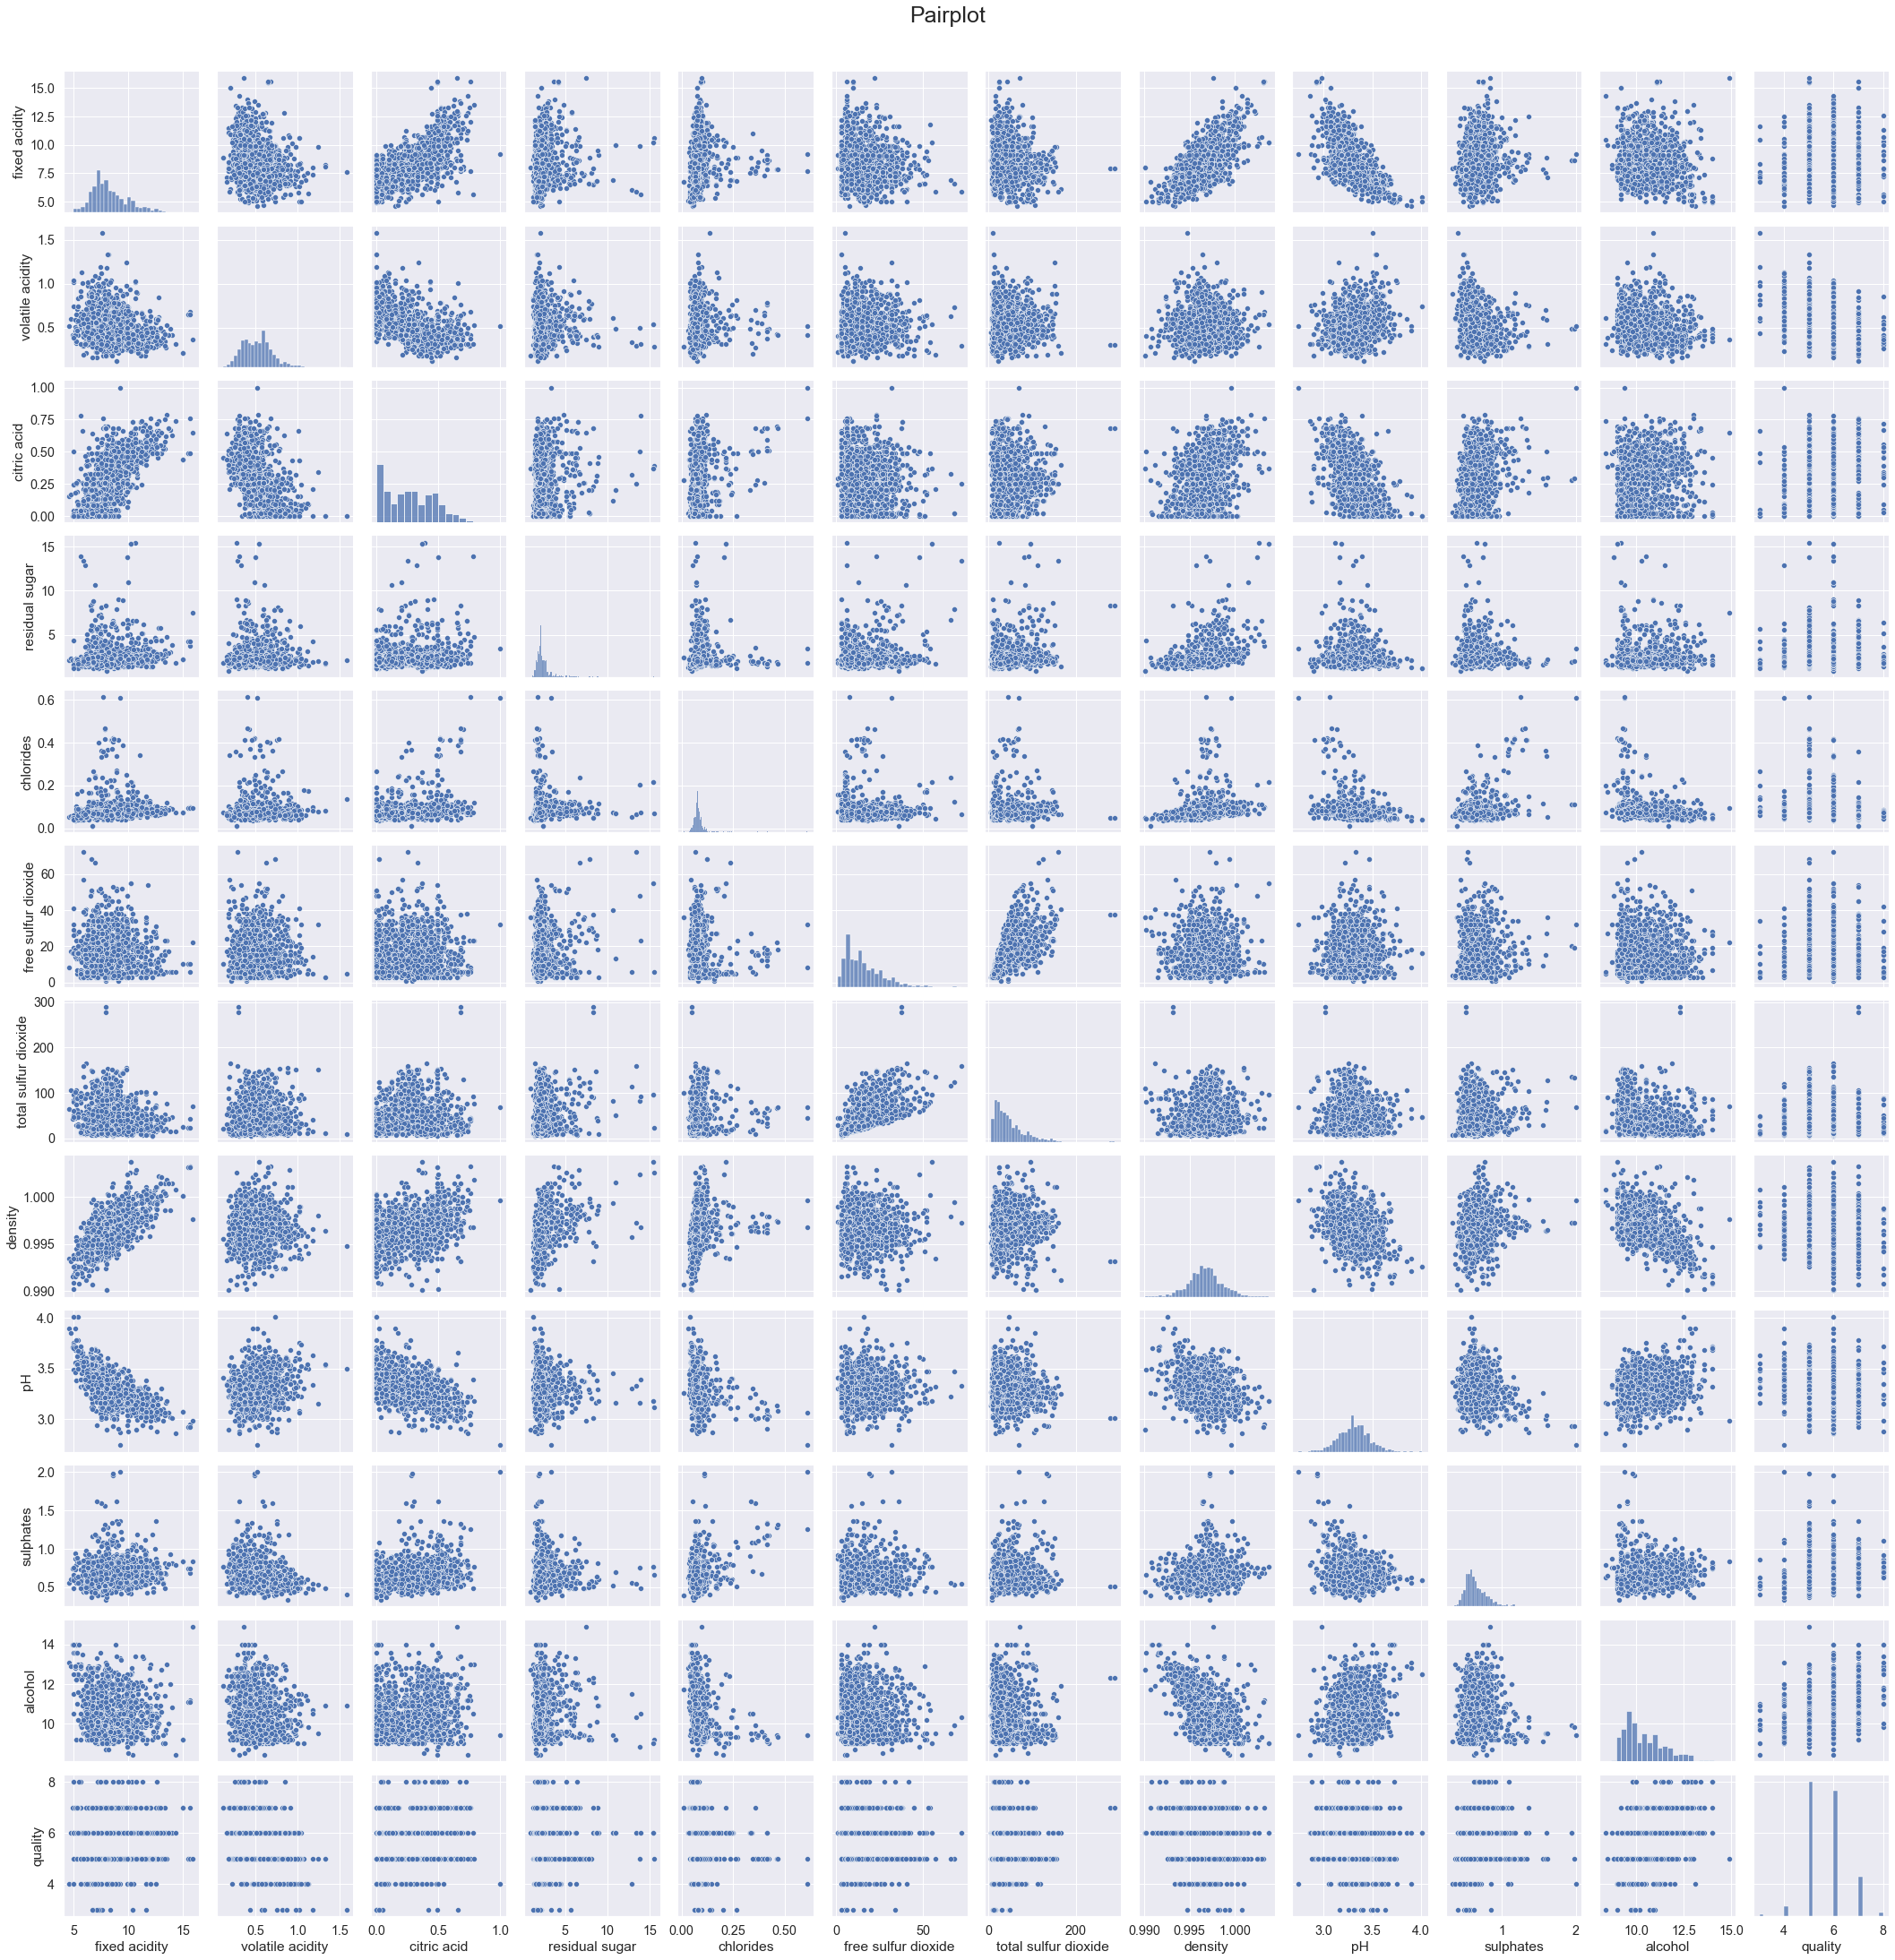

In [85]:
pp = sns.pairplot(gr8_wq)
pp.fig.suptitle("Pairplot", fontsize=30, y=1.02);

### 3.4 Show correlations of wine features and wine quality scores

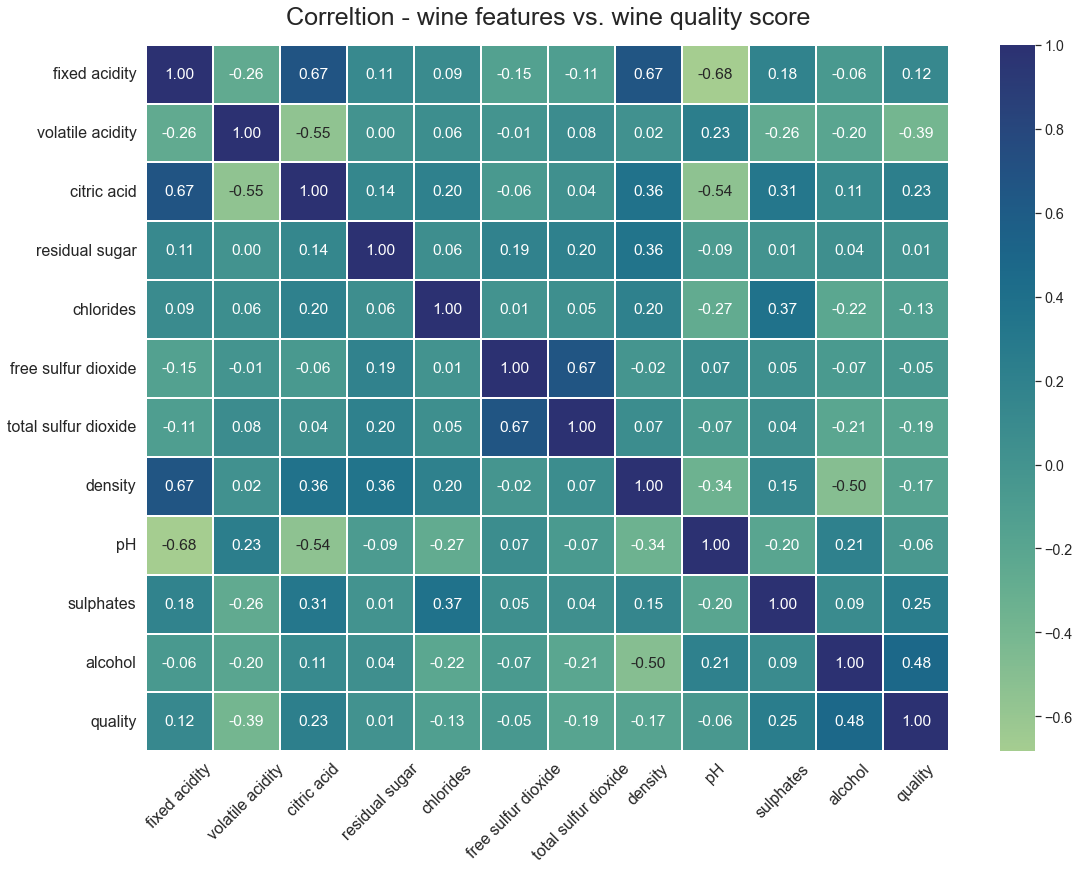

In [15]:
# plot correltion heatmap
plt.figure(figsize=(18,13))
plt.title("Correltion - wine features vs. wine quality score", fontsize=25, pad=20)
sns.set(font_scale=1.3)
corr = sns.heatmap(gr8_wq.corr(), annot=True, fmt='.2f', linewidths=2, cmap="crest")
corr.set_yticklabels(corr.get_ymajorticklabels(), fontsize = 16);
corr.set_xticklabels(corr.get_xmajorticklabels(), fontsize = 16, rotation=45);


##### The correlation heatmap above shows that "Alcohol", "Sulphates", "Citric acid" these three features have high positive correlations with "Wine quality score"; "Volatile acidity", “Total sulfur dioxide" have the high negative correlation with "Wine quality score".

### 3.5 Graph distributions of wine features ("Alcohol", "Sulphates", "Citric acid","Volatile acidity", “Total sulfur dioxide","Chlorides") by wine quality scores

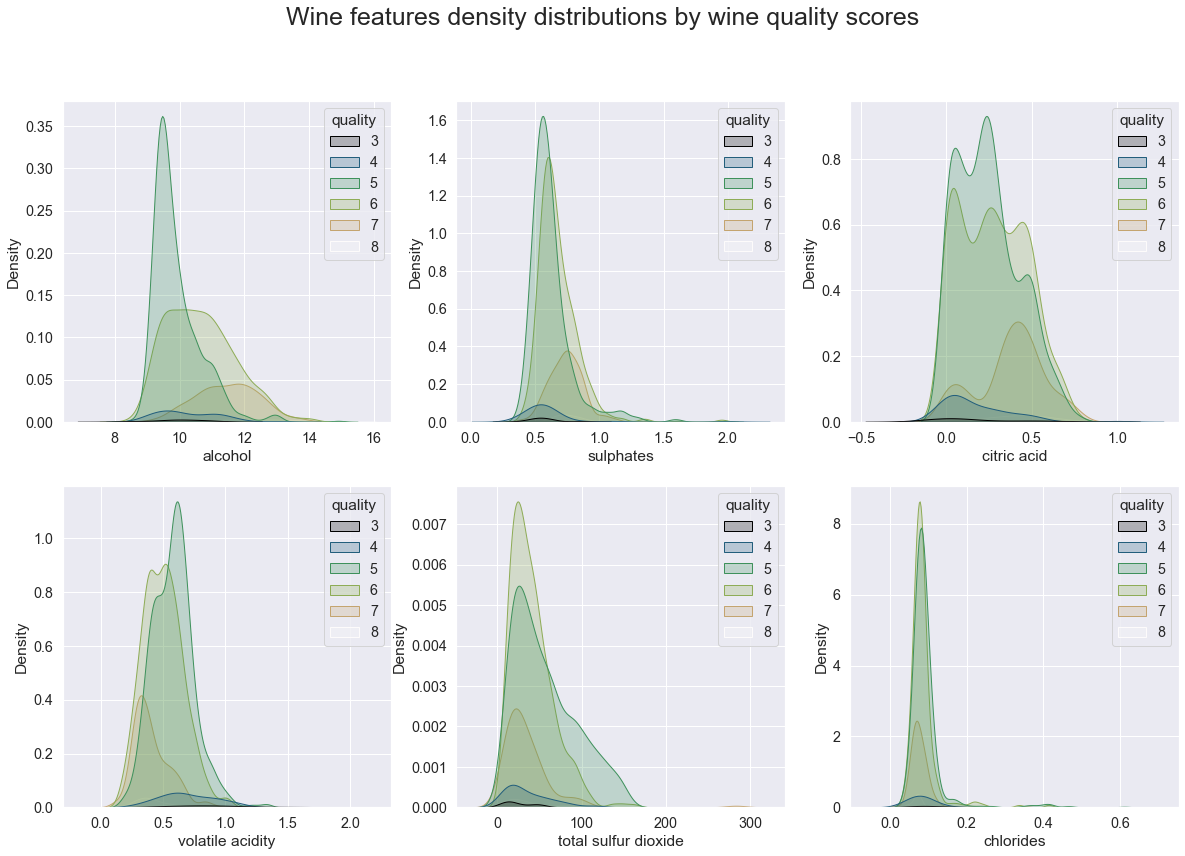

In [77]:
# Wine features distribution plots by wine quality score using Kernel density estimation (KDE)
fig, axes = plt.subplots(2, 3, figsize=(20,13))
fig.suptitle('Wine features density distributions by wine quality scores',fontsize=25, y=1.02)

sns.kdeplot(ax=axes[0, 0], data=gr8_wq, x="alcohol", hue="quality", fill=True, palette='gist_earth');
sns.kdeplot(ax=axes[0, 1], data=gr8_wq, x="sulphates", hue="quality", fill=True, palette='gist_earth');
sns.kdeplot(ax=axes[0, 2], data=gr8_wq, x="citric acid", hue="quality", fill=True, palette='gist_earth');
sns.kdeplot(ax=axes[1, 0], data=gr8_wq, x="volatile acidity", hue="quality", fill=True, palette='gist_earth');
sns.kdeplot(ax=axes[1, 1], data=gr8_wq, x="total sulfur dioxide", hue="quality", fill=True, palette='gist_earth');
sns.kdeplot(ax=axes[1, 2], data=gr8_wq, x="chlorides", hue="quality", fill=True, palette='gist_earth');



#### The distribution plots of above features reflect the same result as correlation heatmap: high quality wines have higher probability to have high level of Alcohol, Sulphates, Citric acid and Volatile acidityl; low level of Total Sulfure dioxide. While low quality wines are in the opposite.